In [335]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import math
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
f = pd.read_csv( '/Users/zzz/Dropbox/未命名文件夹/data/restaurant/all.csv',encoding = 'latin-1')

In [4]:
bool = f['name'].str.contains('McDonald.') 
mc = f[bool.values==True]
mc.head(6)

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
50,51.0,64109,McDonald's,Calgary,AB,T2B 3R9,51.0141241,-114.0004216,1,"Sandwiches, Burgers, Restaurants, Fast Food",...,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,2973,0
67,68.0,40356,McDonald's,Calgary,AB,T2Y 2Z7,50.9065861,-114.0657084,1,"Fast Food, Restaurants, Burgers, Sandwiches",...,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,3721,0
132,133.0,176601,McDonalds,Calgary,AB,T3E,51.037815,-114.13974,1,"Fast Food, Burgers, Restaurants",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8635,0
172,173.0,128970,McDonald's,Calgary,AB,T2L 2J7,51.098413,-114.1437634,1,"Fast Food, Sandwiches, Restaurants, Burgers",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10707,0
210,211.0,12101,McDonald's,Calgary,AB,T2J 6T5,50.928259,-114.0298833,1,"Burgers, Fast Food, Restaurants",...,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,13343,0
329,330.0,87221,McDonald's,Calgary,AB,T2V 5A8,50.97362033,-114.0991212,1,"Fast Food, Sandwiches, Restaurants, Burgers",...,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,20650,0


In [5]:
pwd

'/Users/zzz/Desktop/STAT628/Module 2'

In [6]:
from dfply import *

In [7]:
top20 = pd.read_csv( '/Users/zzz/Dropbox/未命名文件夹/data/top20.csv',encoding = 'latin-1',index_col=0)
top20

,name,n
1,McDonald's,634
2,Subway,621
3,Pizza Hut,251
4,Taco Bell,246
5,Burger King,244
6,Wendy's,231
7,Starbucks,166
8,Domino's Pizza,163
9,KFC,160
10,Chipotle Mexican Grill,147


In [8]:
bool = f['name'].str.contains('.ubwa.') 
sb = f[bool.values==True]
sb.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/subway.csv')
sb.head(3)

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
264,265.0,64799,Subway,Calgary,AB,T2G 2Y8,51.0168614,-114.0451308,1,"Restaurants, Fast Food, Sandwiches",...,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,16425,0
553,554.0,110519,Subway,Calgary,AB,T3R 0A1,51.1562387,-114.1582006,1,"Fast Food, Restaurants, Sandwiches",...,NaN,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-21:0,9:0-21:0,7:0-22:0,34717,0
571,572.0,29387,Subway,Calgary,AB,T2C 4E1,50.9923711,-113.9606836,1,"Soccer, Restaurants, Fast Food, Sandwiches, Ac...",...,NaN,4:0-22:0,4:0-22:0,4:0-22:0,4:0-22:0,8:0-17:0,8:0-17:0,4:0-22:0,35671,0


In [9]:
bool = f['name'].str.contains('.izza Hu.') 
pz = f[bool.values==True]
pz.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/pizzahut.csv')
pz.head(3)

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
24,25.0,18567,Pizza Hut,Calgary,AB,T2A 0V1,51.0386268,-113.9667961,1,"Pizza, Chicken Wings, Restaurants, Italian",...,NaN,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,12:0-22:0,11:0-22:0,1327,0
515,516.0,157097,Pizza Hut,Calgary,AB,T2E 4Y7,51.04570131,-114.0573662,0,"Restaurants, Pizza",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32534,1
809,810.0,125028,Pizza Hut,Calgary,AB,T3B 0N3,51.073674,-114.16481,1,"Chicken Wings, Pizza, Restaurants, Italian, Fo...",...,NaN,11:0-23:0,11:0-23:0,11:0-23:0,11:0-1:0,11:0-1:0,11:0-23:0,11:0-23:0,50030,0


In [10]:
bool = f['name'].str.contains('.aco Bel.') 
tb = f[bool.values==True]
tb.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/tacobell.csv')
tb.head(3)
#tb['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
37,38.0,181368,Taco Bell of Canada,Calgary,AB,T3H 3C8,51.0154135,-114.1690681,0,"Restaurants, Shopping Centers, Mexican, Shoppi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2406,0
501,502.0,13753,Taco Bell of Canada,Calgary,AB,T2A 0S5,51.0378233,-113.9786405,0,"Mexican, Restaurants, Fast Food",...,NaN,10:30-21:30,10:30-21:30,10:30-21:30,10:30-22:0,10:30-22:0,11:0-21:30,10:30-21:30,31682,0
512,513.0,158223,Kentucky Fried Chicken & Taco Bell,Calgary,AB,T3R,51.1614653,-114.1254764,1,"Fast Food, Restaurants",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32353,0


In [11]:
bool = f['name'].str.contains('.urger Kin.') 
bk = f[bool.values==True]
bk.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/burgerking.csv')
bk.head(3)
#bk['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
536,537.0,83897,Burger King Restaurant,Calgary,AB,T2Y 3W5,50.90419429,-114.0676797,1,"Fast Food, Burgers, Restaurants, Hot Dogs",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34189,0
1565,1566.0,154110,Burger King Restaurant,Calgary,AB,T3K 4Y7,51.15466596,-114.0530861,1,"Restaurants, Fast Food, Hot Dogs, Burgers",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101649,0
1801,1802.0,161984,Burger King Restaurant,Calgary,AB,T2A 0V2,51.0380988,-113.964686,1,"Burgers, Hot Dogs, Fast Food, Restaurants",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116481,0


In [12]:
bool = f['name']=='Wendy\'s'
wd = f[bool.values==True]
#wd.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/wendys.csv')
wd = pd.read_csv( '/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/wendys.csv',encoding = 'latin-1')
wd.head(3)
#wd['name'].unique()

,Unnamed: 0,Unnamed: 0.1,business_id,name,city,state,postal_code,latitude,longitude,is_open,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
0,63,64,77221,Wendy's,Calgary,AB,T3B 4T1,51.084158,-114.208183,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3524,0.0
1,286,287,9964,Wendy's,Calgary,AB,T2N 2V2,51.069202,-114.130091,0,...,NaN,10:0-23:0,10:0-23:0,10:0-23:0,10:0-23:0,10:0-23:0,10:0-23:0,10:0-23:0,17971,0.0
2,358,359,23861,Wendy's,Calgary,AB,T2A 6K3,51.055853,-113.982475,1,...,NaN,10:0-0:0,10:0-0:0,10:0-0:0,10:0-0:0,10:0-0:0,10:0-0:0,10:0-0:0,22740,1.0


In [13]:
bool = f['name'].str.contains('.tarbuck.') 
starb = f[bool.values==True]
#starb.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/starbucks.csv')
starb.head(3)
#starb['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
486,487.0,134948,Starbucks,Calgary,AB,T2S 1X1,51.03258921,-114.071759,1,"Coffee & Tea, Cafes, Restaurants, Food",...,NaN,5:30-21:30,5:30-21:30,5:30-21:30,5:30-21:30,6:0-21:30,6:30-20:30,5:30-21:30,30764,0
499,500.0,73448,Starbucks,Calgary,AB,T2P 3C8,51.0485784,-114.0807059,1,"Restaurants, Cafes, Food, Coffee & Tea",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31613,1
1072,1073.0,127430,Starbucks,Calgary,AB,T3L,51.12409828,-114.2466652,1,"Restaurants, Coffee & Tea, Food, Cafes",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67995,0


In [14]:
bool = f['name'].str.contains('.omino\'s Pizz.') 
dp = f[bool.values==True]
#dp.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/dominospizza.csv')
dp.head(3)
#dp['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
372,373.0,137604,Domino's Pizza,Calgary,AB,T2K 6H2,51.1116742,-114.0558965,1,"Pizza, Restaurants",...,NaN,11:0-23:30,11:0-23:30,11:0-23:30,11:0-1:30,11:0-1:30,12:0-23:30,11:0-23:0,23894,0
672,673.0,181677,Domino's Pizza,Calgary,AB,T3H 0N9,51.0348223,-114.1914922,1,"Pizza, Restaurants, Italian",...,NaN,10:30-0:0,10:30-0:0,10:30-0:0,10:30-1:0,10:30-1:0,10:30-0:0,10:30-0:0,42083,0
1235,1236.0,181011,Domino's Pizza,Calgary,AB,T2W 5V3,50.9386093,-114.0837092,1,"Restaurants, Pizza",...,NaN,11:0-0:0,11:0-0:0,11:0-0:0,11:0-2:0,11:0-2:0,11:0-0:0,11:0-0:0,80203,0


In [15]:
bool = f['name'].str.contains('KFC') 
kfc = f[bool.values==True]
#kfc.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/KFC.csv')
kfc.head(3)
#kfc['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
39,40.0,14859,KFC,Calgary,AB,T3B 0N3,51.0733526,-114.1646684,1,"Fast Food, Chicken Shop, Restaurants, American...",...,NaN,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,2431,0
321,322.0,95799,KFC,Calgary,AB,T3G 2P6,51.12483606,-114.1982993,1,"Chicken Shop, Chicken Wings, Restaurants, Amer...",...,NaN,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,20139,1
923,924.0,69877,KFC,Calgary,AB,T2J 0P7,50.9691858,-114.0707889,1,"Chicken Wings, Restaurants, American (Traditio...",...,NaN,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,58267,0


In [16]:
bool = f['name'].str.contains('.hipotle Mexican Gril.') 
cmg = f[bool.values==True]
#cmg.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Chipotle_Mexican_Grill.csv')
cmg.head(3)
#cmg['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
3198,783.0,35337,Chipotle Mexican Grill,Gilbert,AZ,85296,33.3300481,-111.7909503,1,"Tex-Mex, Fast Food, Restaurants, Mexican",...,NaN,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,13819,1
3317,902.0,179517,Chipotle Mexican Grill,Mesa,AZ,85204,33.3796878,-111.7560177,1,"Sandwiches, Fast Food, Mexican, Restaurants, T...",...,NaN,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,16197,1
3409,994.0,25275,Chipotle Mexican Grill,Phoenix,AZ,85022,33.6399644,-112.0676247,1,"Tex-Mex, Fast Food, Mexican, Restaurants",...,NaN,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,10:45-22:0,17761,0


In [17]:
bool = f['name'].str.contains('.im Horto.') 
th = f[bool.values==True]
#th.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Tim_Hortons.csv')
th.head(3)
#th['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
295,296.0,42309,Tim Hortons,Calgary,AB,T1Y 6J7,51.0807314,-113.9882845,1,"Restaurants, Bakeries, Food, Coffee & Tea, Cafes",...,NaN,5:0-22:0,5:0-22:0,5:0-22:0,5:0-22:0,5:0-22:0,5:0-22:0,5:0-22:0,18642,1
305,306.0,192499,Tim Hortons,Calgary,AB,NaN,50.92395487,-113.9319962,1,"Cafes, Fast Food, Restaurants, Sandwiches",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19113,0
337,338.0,87212,Tim Hortons,Calgary,AB,T2H 0P4,51.00187236,-114.0540856,1,"Food, Cafes, Restaurants",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21122,0


In [18]:
bool = f['name'].str.contains('.immy Joh.') 
jj = f[bool.values==True]
#jj.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Jimmy_Johns.csv')
jj.head(3)
#jj['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
2573,158.0,35283,Jimmy John's,Phoenix,AZ,85032,33.59857719,-111.9784468,1,"Food Delivery Services, Sandwiches, Delis, Res...",...,NaN,9:30-22:0,9:30-22:0,9:30-22:0,9:30-22:0,9:30-22:0,9:30-22:0,9:30-22:0,2794,0
2770,355.0,125888,Jimmy John's,Phoenix,AZ,85003,33.44820769,-112.0747094,1,"Food, Sandwiches, Food Delivery Services, Rest...",...,NaN,11:0-19:0,11:0-19:0,11:0-19:0,11:0-19:0,11:0-16:0,NaN,11:0-19:0,5833,0
3688,1273.0,26761,Jimmy John's,Chandler,AZ,85286,33.2801262,-111.7954553,1,"Fast Food, Delis, Sandwiches, Restaurants",...,NaN,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,21940,0


In [19]:
bool = f['name'].str.contains('.apa John\'s Pizz.') 
pj = f[bool.values==True]
#pj.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Papa_Johns_Pizza.csv')
pj.head(3)
#pj['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
715,716.0,15984,Papa John's Pizza,Calgary,AB,T1Y 7G6,51.076287,-113.9900978,1,"Restaurants, Pizza",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44703,1
1045,1046.0,191265,Papa John's Pizza,Calgary,AB,T2Z 4Y2,50.912807,-113.950007,1,"Restaurants, Pizza",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66581,0
1108,1109.0,81334,Papa John's Pizza,Calgary,AB,T3H 4R5,51.0364729,-114.167857,1,"Restaurants, Pizza",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71138,0


In [20]:
bool = f['name'].str.contains('.anera Brea.') 
pb = f[bool.values==True]
#pb.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Panera_Bread.csv')
pb.head(3)
#pb['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
2432,17.0,132930,Panera Bread,Chandler,AZ,85248,33.24816826,-111.8397653,0,"Food, Sandwiches, Restaurants, Soup, Bakeries,...",...,NaN,6:0-21:0,6:0-21:0,6:0-21:0,6:0-21:0,6:0-21:0,7:0-21:0,6:0-21:0,305,0
2561,146.0,81918,Panera Bread,Tempe,AZ,85281,33.43294544,-111.9055821,1,"Soup, Sandwiches, Restaurants, Salad",...,NaN,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,9:0-22:0,7:0-22:0,2633,1
2970,555.0,43242,Panera Bread,Chandler,AZ,85248,33.248227,-111.839767,1,"Sandwiches, Soup, Restaurants, Salad, Cafes",...,NaN,6:0-21:0,6:0-21:0,6:0-21:0,6:0-22:0,6:0-22:0,7:0-20:0,6:0-21:0,9621,0


In [21]:
bool = f['name'].str.contains('.anda Expres.') 
pe = f[bool.values==True]
pe.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Panda Express.csv')
pe.head(3)
#pe['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
1287,1288.0,190809,Panda Express,Calgary,AB,T2Z 4E7,50.93295676,-113.9677081,1,"Chinese, Restaurants, Fast Food",...,NaN,10:30-22:30,10:30-22:30,10:30-22:30,10:30-22:30,10:30-22:30,11:0-22:30,10:30-22:30,83991,0
2456,41.0,123943,Panda Express,Tempe,AZ,85282,33.3831468,-111.9647254,0,"Restaurants, Fast Food, Chinese",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,593,1
2527,112.0,46286,Panda Express,Avondale,AZ,85323,33.4490139,-112.3079079,1,"Restaurants, Fast Food, Chinese",...,NaN,10:0-21:30,10:0-21:30,10:0-21:30,10:0-21:30,10:0-21:30,10:30-21:30,10:0-21:30,1952,0


In [22]:
bool = f['name'].str.contains('.opeyes Louisiana Kitche.') 
plk = f[bool.values==True]
#plk.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Popeyes_Louisiana_Kitchen.csv')
plk.head(3)
#plk['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
1547,1548.0,173714,Popeyes Louisiana Kitchen,Calgary,AB,T2A 0S5,51.0378,-113.978457,1,"Fast Food, Restaurants, Chicken Wings, Food, S...",...,NaN,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,11:0-23:0,100614,0
2064,2065.0,179565,Popeyes Louisiana Kitchen,Calgary,AB,T2T 0C3,51.038131,-114.0920639,1,"Chicken Wings, Restaurants, Fast Food",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132640,0
4464,2049.0,164352,Popeyes Louisiana Kitchen,Peoria,AZ,85381,33.6095153,-112.2380996,1,"American (Traditional), Fast Food, Restaurants...",...,NaN,10:0-23:0,10:0-23:0,10:0-23:0,10:0-23:0,10:0-23:0,10:0-23:0,10:0-23:0,35041,0


In [23]:
bool = f['name'].str.contains('.airy Quee.') 
dq = f[bool.values==True]
#dq.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Dairy_Queen.csv')
dq.head(3)
#dq['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
14,15.0,173463,Dairy Queen Brazier,Calgary,AB,T3E 6K6,51.01382725,-114.1327861,1,"Restaurants, Ice Cream & Frozen Yogurt, Food, ...",...,NaN,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,884,0
273,274.0,135801,Dairy Queen Grill & Chill Restaurant,Calgary,AB,T2H 3B5,50.9789547,-114.0410893,1,"Fast Food, Restaurants, Food, Ice Cream & Froz...",...,NaN,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,17089,0
373,374.0,167367,Dairy Queen,Calgary,AB,T2W 0K1,50.96088413,-114.1058246,1,"Ice Cream & Frozen Yogurt, Food, Restaurants, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23933,0


In [24]:
bool = f['name'].str.contains('Arby\'s.') 
ar = f[bool.values==True]
#ar.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Arbys.csv')
ar.head(3)
#ar['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
362,363.0,123906,Arby's Restaurant,Calgary,AB,T2G 2H8,51.0410206,-114.060465,0,"Fast Food, Restaurants",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23195,0
2823,408.0,15894,Arby's Roast Beef,Tempe,AZ,85282,33.3923064,-111.977815,0,"Fast Food, Restaurants",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6725,0
3542,1127.0,78017,Arby's Roast Beef,Phoenix,AZ,85015,33.5094627,-112.0921021,0,"American (Traditional), Restaurants",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19609,0


In [25]:
bool = f['name'].str.contains('Denny.') 
den = f[bool.values==True]
#den.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Dennys.csv')
den.head(3)
#den['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
29,30.0,101667,Denny's,Calgary,AB,T2H 0B8,50.98254118,-114.0450463,1,"Breakfast & Brunch, American (Traditional), Re...",...,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,1772,0
396,397.0,66498,Denny's,Calgary,AB,T2H 0L8,50.9894303,-114.0724232,1,"Breakfast & Brunch, Restaurants, American (Tra...",...,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,25144,0
658,659.0,36676,Denny's,Calgary,AB,T3G 4M4,51.12622702,-114.2073305,1,"American (Traditional), Diners, Restaurants, B...",...,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,41457,1


In [26]:
bool = f['name'].str.contains('.ittle Caesars.') 
lcp = f[bool.values==True]
#lcp.to_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/Little_Caesars_Pizza.csv')
lcp.head(3)
#lcp['name'].unique()

,Unnamed: 0,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
788,789.0,130253,Little Caesars Pizza,Calgary,AB,T2C 2N5,50.983458,-114.014459,1,"Pizza, Restaurants",...,NaN,11:0-21:45,11:0-21:45,11:0-21:45,11:0-22:45,11:0-22:45,11:0-21:45,11:0-21:45,48727,0
826,827.0,87527,Little Caesars Pizza,Airdrie,AB,T3A 0K9,51.26983632,-113.9881325,1,"Restaurants, Food, Pizza",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50734,0
1184,1185.0,69745,Little Caesars Pizza,Calgary,AB,T2J 0N2,50.94216334,-114.0461516,1,"Italian, Shopping Centers, Chicken Wings, Shop...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76850,0


In [27]:
all1 = pd.read_csv( '/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/all.csv',encoding = 'latin-1',index_col=0)
all1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6334 entries, 25.0 to 931.0
Data columns (total 57 columns):
business_id                              6334 non-null object
name                                     6334 non-null object
city                                     6334 non-null object
state                                    6330 non-null object
postal_code                              6329 non-null object
latitude                                 6334 non-null float64
longitude                                6334 non-null float64
is_open                                  6334 non-null object
categories                               5873 non-null object
attributes.GoodForKids                   4470 non-null object
attributes.NoiseLevel                    4029 non-null object
attributes.RestaurantsDelivery           4154 non-null object
attributes.GoodForMeal                   2865 non-null object
attributes.Alcohol                       3556 non-null object
attributes.Caters

In [28]:
top20['n'].sum()

4003

In [29]:
all1.head(3)

,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,attributes.GoodForKids,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
25.0,18567,Pizza Hut,Calgary,AB,T2A 0V1,51.038627,-113.966796,1,"Pizza, Chicken Wings, Restaurants, Italian",1,...,NaN,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,12:0-22:0,11:0-22:0,1327.0,0.0
516.0,157097,Pizza Hut,Calgary,AB,T2E 4Y7,51.045701,-114.057366,0,"Restaurants, Pizza",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32534.0,1.0
810.0,125028,Pizza Hut,Calgary,AB,T3B 0N3,51.073674,-114.164810,1,"Chicken Wings, Pizza, Restaurants, Italian, Fo...",NaN,...,NaN,11:0-23:0,11:0-23:0,11:0-23:0,11:0-1:0,11:0-1:0,11:0-23:0,11:0-23:0,50030.0,0.0


In [30]:
all1 = pd.read_csv( '/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/all.csv',encoding = 'latin-1',index_col=0)
all1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6334 entries, 25.0 to 931.0
Data columns (total 57 columns):
business_id                              6334 non-null object
name                                     6334 non-null object
city                                     6334 non-null object
state                                    6330 non-null object
postal_code                              6329 non-null object
latitude                                 6334 non-null float64
longitude                                6334 non-null float64
is_open                                  6334 non-null object
categories                               5873 non-null object
attributes.GoodForKids                   4470 non-null object
attributes.NoiseLevel                    4029 non-null object
attributes.RestaurantsDelivery           4154 non-null object
attributes.GoodForMeal                   2865 non-null object
attributes.Alcohol                       3556 non-null object
attributes.Caters

In [38]:
r_sample1 = r_sample[0]
#r_sample1

In [37]:
r_sample1[1]

'{"business_id": 35344, "stars": 5.0, "text": "I *adore* Travis at the Hard Rock\'s new Kelly Cardenas Salon!  I\'m always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  \\n\\nTravis\'s greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit.  Next comes the most relaxing and incredible shampoo -- where you get a full head message that could cure even the very worst migraine in minutes --- and the scented shampoo room.  Travis has freakishly strong fingers (in a good way) and use the perfect amount of pressure.  That was superb!  Then starts the glorious blowout... where not one, not two, but THREE people were involved in doing the best round-brush action my hair has ever seen.  The team of stylists clearly gets along extremely well, as it\'s evident from the way they talk to and help one another that it\'s really genu

In [31]:
top20

,name,n
1,McDonald's,634
2,Subway,621
3,Pizza Hut,251
4,Taco Bell,246
5,Burger King,244
6,Wendy's,231
7,Starbucks,166
8,Domino's Pizza,163
9,KFC,160
10,Chipotle Mexican Grill,147


In [32]:
sb = pd.read_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/subway.csv',encoding = 'latin-1',index_col=0)
sb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 264 to 47188
Data columns (total 58 columns):
Unnamed: 0.1                             622 non-null float64
business_id                              622 non-null int64
name                                     622 non-null object
city                                     622 non-null object
state                                    622 non-null object
postal_code                              620 non-null object
latitude                                 622 non-null float64
longitude                                622 non-null float64
is_open                                  622 non-null int64
categories                               622 non-null object
attributes.GoodForKids                   516 non-null object
attributes.NoiseLevel                    272 non-null object
attributes.RestaurantsDelivery           495 non-null object
attributes.GoodForMeal                   171 non-null object
attributes.Alcohol                  

In [104]:
bid = sb['business_id'].unique()

In [48]:
import json
data_file = '/Users/zzz/Desktop/STAT628/Module 2/Data/review_train.json'

r_sample = []
with open(data_file, 'r') as f:
    r_sample.append(f.readlines())

In [49]:
r_sample1 = r_sample[0]
review = []

for i in range(0,len(r_sample1)):
    r_review = json.loads(r_sample1[i])
    if r_review['business_id'] in bid:
        review.append(r_review)

In [50]:
review[0]['business_id']

39822

In [67]:
business_id = []
text = []
stars = []
name = []

In [68]:
for i in range(0,1986):
    business_id.append(review[i]['business_id'])
    text.append(review[i]['text'])
    stars.append(review[i]['stars'])

In [81]:
sb_r = pd.DataFrame(business_id)
sb_r.insert(1,'text',text)
sb_r.insert(2,'stars',stars)
sb_r.columns = ['business_id', 'text','stars']
#sb_r.to_csv("/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/subway_r.csv")
sb_r.head(3)

,business_id,text,stars
0,39822,Came in today around 4:50 pm and theres was 2 ...,5.0
1,189435,The employees are so friendly and hard working...,5.0
2,76155,"Seems nobody is a fan, but I seldomly follow t...",4.0


In [82]:
sb_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 3 columns):
business_id    1986 non-null int64
text           1986 non-null object
stars          1986 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 46.6+ KB


In [113]:
ssb = sb.iloc[:,lambda df:[1,3,4,57]]
ssb.head(3)

,business_id,city,state,circle
264,64799,Calgary,AB,0.0
553,110519,Calgary,AB,0.0
571,29387,Calgary,AB,0.0


In [114]:
SB = pd.merge(ssb,sb_r)
SB.to_csv("/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/subway_r.csv")
SB.head(3)

,business_id,city,state,circle,text,stars
0,64799,Calgary,AB,0.0,Several years ago I worked in the area and wou...,3.0
1,64799,Calgary,AB,0.0,OMG!! I'm ordering a steak & cheese footling. ...,1.0
2,64799,Calgary,AB,0.0,Subway location in a Mac's location just off o...,3.0


In [115]:
SB.shape[0]

1986

In [116]:
import re

SB.loc[:,'text']=SB['text'].apply(lambda sen: re.sub(r"can\'t", "can not", sen))
SB['text']=SB['text'].apply(lambda sen: re.sub(r"cannot", "can not ", sen))
SB['text']=SB['text'].apply(lambda sen: re.sub(r"what\'s", "what is", sen))
SB['text']=SB['text'].apply(lambda sen: re.sub(r"\'ve ", " have ", sen))
SB['text']=SB['text'].apply(lambda sen: re.sub(r"n\'t", " not ", sen))
SB['text']=SB['text'].apply(lambda sen: re.sub(r"i\'m", "i am ", sen))
SB['text']=SB['text'].apply(lambda sen: re.sub(r"\'re", " are ", sen))
SB['text']=SB['text'].apply(lambda sen: re.sub(r"\'d", " would ", sen))
SB['text']=SB['text'].apply(lambda sen: re.sub(r"\'ll", " will ", sen))

In [118]:
data_dict=SB

In [119]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import nltk 
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english')) 

from nltk import *
data_dict.loc[:,'NN'] =None
data_dict.loc[:,'JJ']=None
data_dict.loc[:,'RB']=None


import numpy as np
def detect(text):
    NN = []
    JJ = []
    RB = []
    text =  word_tokenize(text)
    temp = nltk.pos_tag(text)
    i = 0
    for word, tag in temp:
        if word in stop_words:
            continue
        if re.match('JJ[*]?', tag) != None:
            JJ.append(word)
        if re.match('NN[*]?', tag) != None:
            NN.append(word)
        if re.match('RB[*]?', tag) != None:
            RB.append(word)
    return list([NN, JJ, RB])

temp = pd.DataFrame(list(data_dict['text'].apply(detect)))
data_dict['NN'], data_dict['JJ'], data_dict['RB'] = temp[:][0], temp[:][1], temp[:][2]

In [120]:
NN = []

for item in data_dict['NN']:
    NN += item
#count the words
from collections import Counter

#count the words
words=NN

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_n = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_n = []
reviews_ints_n.append([vocab_to_int_n[word] for word in NN])
print('Unique words: ', len((vocab_to_int_n)))
counts.most_common(20)

Unique words:  5818


[('Subway', 1044),
 ('sandwich', 958),
 ('service', 696),
 ('location', 673),
 ('time', 587),
 ('subway', 548),
 ('food', 526),
 ('order', 439),
 ('customer', 417),
 ('place', 395),
 ('bread', 386),
 ('sandwiches', 381),
 ('sub', 335),
 ('staff', 304),
 ('employees', 287),
 ('people', 276),
 ('store', 245),
 ('lunch', 242),
 ('way', 237),
 ('line', 222)]

In [121]:
JJ = []
for item in data_dict['JJ']:
    JJ += item
#count the words
from collections import Counter

words=JJ
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_j = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_j = []
reviews_ints_j.append([vocab_to_int_j[word] for word in JJ])
#常见J
print('Unique words: ', len((vocab_to_int_j)))
counts.most_common(20)

Unique words:  1893


[('good', 440),
 ('great', 300),
 ('fresh', 265),
 ('clean', 260),
 ('friendly', 240),
 ('nice', 226),
 ('bad', 190),
 ('sandwich', 169),
 ('little', 153),
 ('extra', 143),
 ('last', 142),
 ('best', 140),
 ('rude', 140),
 ('sure', 136),
 ('new', 131),
 ('first', 131),
 ('quick', 130),
 ('much', 116),
 ('next', 115),
 ('busy', 114)]

In [122]:
#####################
RB = []
for item in data_dict['RB']:
    RB += item
#count the words
from collections import Counter

words=RB

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_r = {word: ii for ii, word in enumerate(vocab, 1)}
#常见R
print('Unique words: ', len((vocab_to_int_r)))
counts.most_common(20)

reviews_ints_r = []
reviews_ints_r.append([vocab_to_int_r[word] for word in RB])

Unique words:  633


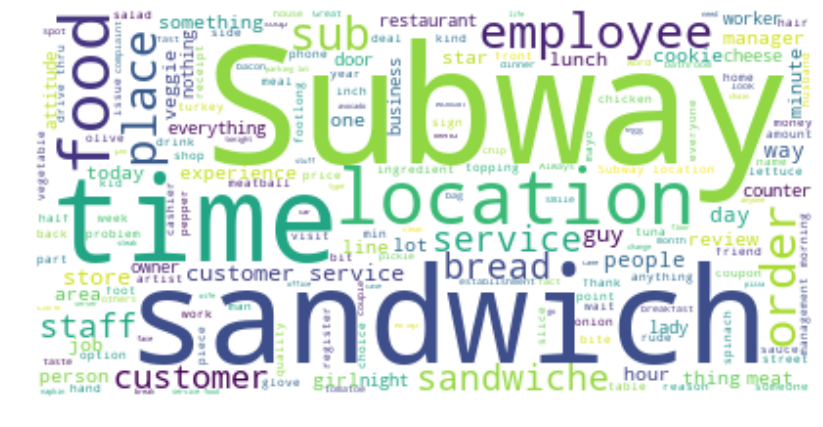

In [123]:
plt.style.use('ggplot')
tt = ' '.join(NN)
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
wordcloud = WordCloud(background_color="white").generate(tt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
#plt.title('Reviews',size=20)
plt.show()

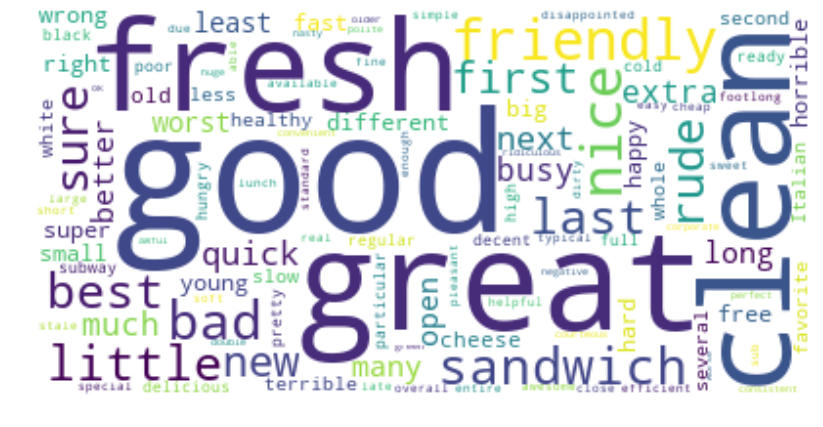

In [124]:
plt.style.use('ggplot')
tt = ' '.join(JJ)
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
wordcloud = WordCloud(background_color="white").generate(tt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
#plt.title('Reviews',size=20)
plt.show()

In [125]:
sb_R = pd.read_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/subway_r.csv',encoding = 'latin-1',index_col=0)

In [126]:
sb_R.head(3)

,business_id,city,state,circle,text,stars
0,64799,Calgary,AB,0.0,Several years ago I worked in the area and wou...,3.0
1,64799,Calgary,AB,0.0,OMG!! I'm ordering a steak & cheese footling. ...,1.0
2,64799,Calgary,AB,0.0,Subway location in a Mac's location just off o...,3.0


In [128]:
sb_R['length'] = sb_R['text'].apply(len)
sb_R.head()

,business_id,city,state,circle,text,stars,length
0,64799,Calgary,AB,0.0,Several years ago I worked in the area and wou...,3.0,467
1,64799,Calgary,AB,0.0,OMG!! I'm ordering a steak & cheese footling. ...,1.0,270
2,64799,Calgary,AB,0.0,Subway location in a Mac's location just off o...,3.0,130
3,110519,Calgary,AB,0.0,My aunt and I had lunch here on the weekend. S...,4.0,251
4,110519,Calgary,AB,0.0,Fuck this place. Nothing worse than sitting tr...,1.0,297


In [129]:
sb_R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 7 columns):
business_id    1986 non-null int64
city           1986 non-null object
state          1986 non-null object
circle         1896 non-null float64
text           1986 non-null object
stars          1986 non-null float64
length         1986 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 124.1+ KB


In [130]:
sb1 = sb_R.sort_values('business_id')
sb1.head(3)

,business_id,city,state,circle,text,stars,length
1502,53,Las Vegas,NV,0.0,Rudeness. What happened to $5 footlongs? 2 san...,2.0,127
1506,53,Las Vegas,NV,0.0,Their breads are pretty good ! a lot of fresh ...,5.0,167
1500,53,Las Vegas,NV,0.0,Never thought I'd be compelled to write a revi...,5.0,281


In [131]:
sb1['stars'].mean()

2.6852970795568982

In [134]:
s = sb1.groupby('business_id')['stars'].mean()
#s

In [135]:
num = sb1.groupby('business_id')['stars'].count()
#num

In [143]:
a = sb1['business_id'].unique()
business_id = []
stars=[]
Num=[]
for i in a:    
    business_id.append(i)
    stars.append(s[i])
    Num.append(num[i])
    #print(i,m[i],num[i])
    
df = pd.DataFrame({'business_id':business_id,'avgstar':stars,'num':Num})
df.head(3) #246

,business_id,avgstar,num
0,53,2.666667,9
1,1667,2.666667,3
2,4349,3.333333,3


In [146]:
df4 = df[df['num']>=3]
df4.head(3)  #243/246

,business_id,avgstar,num
0,53,2.666667,9
1,1667,2.666667,3
2,4349,3.333333,3


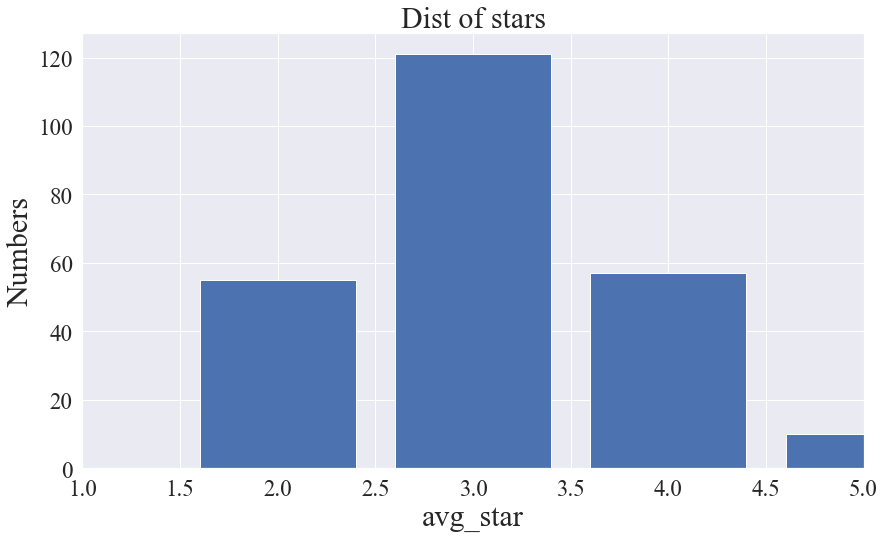

In [147]:
star = np.array([2., 3., 4., 5.])
s2 = sum(df4['avgstar']<=2)
s3 = sum(df4['avgstar']<=3)
s4 = sum(df4['avgstar']<=4)
s5 =sum(df4['avgstar']<=5)

font2 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 30,
         }

c = [s2,s3-s2,s4-s3,s5-s4] #[322, 203, 32, 1]
#fig = plt.figure()
figsize = 14,8
figure, ax = plt.subplots(figsize=figsize)

plt.tick_params(labelsize=23)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]


plt.bar(star,c)
plt.xlabel("avg_star", font2)
plt.ylabel("Numbers", font2)
plt.title("Dist of stars", font2)
plt.xlim([1,5])

plt.show()

In [151]:
new_sb = pd.merge(sb1,df4)
new_sb.head(3) #1980

,business_id,city,state,circle,text,stars,length,avgstar,num
0,53,Las Vegas,NV,0.0,Rudeness. What happened to $5 footlongs? 2 san...,2.0,127,2.666667,9
1,53,Las Vegas,NV,0.0,Their breads are pretty good ! a lot of fresh ...,5.0,167,2.666667,9
2,53,Las Vegas,NV,0.0,Never thought I'd be compelled to write a revi...,5.0,281,2.666667,9


In [280]:
l_sb = new_sb[new_sb['avgstar']<=3]
l_sb.to_csv("l_sb.csv")
l_sb = pd.read_csv('l_sb.csv',encoding='latin-1')
l_sb.head(20)

,Unnamed: 0,business_id,city,state,circle,text,stars,length,avgstar,num
0,0,53,Las Vegas,NV,0.0,Rudeness. What happened to $5 footlongs? 2 san...,2.0,127,2.666667,9
1,1,53,Las Vegas,NV,0.0,Their breads are pretty good ! a lot of fresh ...,5.0,167,2.666667,9
2,2,53,Las Vegas,NV,0.0,Never thought I'd be compelled to write a revi...,5.0,281,2.666667,9
3,3,53,Las Vegas,NV,0.0,Came for a quick breakfast on my way to work e...,1.0,927,2.666667,9
4,4,53,Las Vegas,NV,0.0,So my girl in I just went to this subway. You ...,2.0,362,2.666667,9
5,5,53,Las Vegas,NV,0.0,Jasper was really nice and just overall very g...,5.0,145,2.666667,9
6,6,53,Las Vegas,NV,0.0,"The ladies here are so rude, I speak Spanish f...",1.0,284,2.666667,9
7,7,53,Las Vegas,NV,0.0,"The store is closed after midnight.But,on the ...",1.0,118,2.666667,9
8,8,53,Las Vegas,NV,0.0,Been to this subway a few times.\nThe place is...,2.0,298,2.666667,9
9,9,1667,Mesa,AZ,1.0,"Come visit us! New management, new staff! Ment...",5.0,217,2.666667,3


In [281]:
l_sb.shape[0]

1420

In [282]:
h_sb = new_sb[new_sb['avgstar']>3]
h_sb.to_csv("h_sb.csv")
h_sb = pd.read_csv('h_sb.csv',encoding='latin-1')

In [283]:
h_sb.shape[0]

560

In [250]:
data_dict=l_sb

In [251]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import nltk 
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english')) 

from nltk import *
data_dict.loc[:,'NN'] =None
data_dict.loc[:,'JJ']=None
data_dict.loc[:,'RB']=None


import numpy as np
def detect(text):
    NN = []
    JJ = []
    RB = []
    text =  word_tokenize(text)
    temp = nltk.pos_tag(text)
    i = 0
    for word, tag in temp:
        if word in stop_words:
            continue
        if re.match('JJ[*]?', tag) != None:
            JJ.append(word)
        if re.match('NN[*]?', tag) != None:
            NN.append(word)
        if re.match('RB[*]?', tag) != None:
            RB.append(word)
    return list([NN, JJ, RB])

temp = pd.DataFrame(list(data_dict['text'].apply(detect)))
data_dict['NN'], data_dict['JJ'], data_dict['RB'] = temp[:][0], temp[:][1], temp[:][2]

In [252]:
NN = []

for item in data_dict['NN']:
    NN += item
#count the words
from collections import Counter

#count the words
words=NN

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_n = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_n = []
reviews_ints_n.append([vocab_to_int_n[word] for word in NN])
print('Unique words: ', len((vocab_to_int_n)))
counts.most_common(20)

Unique words:  4862


[('Subway', 744),
 ('sandwich', 707),
 ('service', 494),
 ('location', 484),
 ('time', 456),
 ('food', 379),
 ('subway', 377),
 ('order', 349),
 ('customer', 327),
 ('bread', 301),
 ('place', 300),
 ('sandwiches', 269),
 ('sub', 245),
 ('people', 212),
 ('employees', 207),
 ('staff', 203),
 ('guy', 172),
 ('store', 168),
 ('times', 166),
 ('way', 157)]

In [253]:
JJ = []
for item in data_dict['JJ']:
    JJ += item
#count the words
from collections import Counter

words=JJ
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_j = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_j = []
reviews_ints_j.append([vocab_to_int_j[word] for word in JJ])
#常见J
print('Unique words: ', len((vocab_to_int_j)))
counts.most_common(20)

Unique words:  1593


[('good', 289),
 ('great', 173),
 ('fresh', 171),
 ('clean', 156),
 ('bad', 144),
 ('nice', 139),
 ('friendly', 129),
 ('sandwich', 123),
 ('rude', 121),
 ('little', 114),
 ('first', 111),
 ('last', 108),
 ('sure', 105),
 ('extra', 95),
 ('new', 92),
 ('much', 91),
 ('next', 85),
 ('busy', 82),
 ('quick', 80),
 ('better', 79)]

In [254]:
#####################
RB = []
for item in data_dict['RB']:
    RB += item
#count the words
from collections import Counter

words=RB

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_r = {word: ii for ii, word in enumerate(vocab, 1)}
#常见R
print('Unique words: ', len((vocab_to_int_r)))
counts.most_common(20)

reviews_ints_r = []
reviews_ints_r.append([vocab_to_int_r[word] for word in RB])

Unique words:  559


In [255]:
words=NN
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_n = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_n = []
reviews_ints_n.append([vocab_to_int_n[word] for word in NN])
#print('Unique words: ', len((vocab_to_int_n)))
#counts.most_common(20)

In [256]:
#l_nouns = pd.read_csv("l_nouns.csv")
a = vocab
nouns = []
freq=[]
Num=[]
#l = counts.sum
for i in a:    
    nouns.append(i)
    Num.append(counts[i])
    freq.append(counts[i]/1420)  

l_nouns = pd.DataFrame({'noun':nouns,'num':Num,'freqs':freq})
l_nouns.head(3)

,noun,num,freqs
0,Subway,744,0.523944
1,sandwich,707,0.497887
2,service,494,0.347887


In [257]:
words=JJ
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_j = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_j = []
reviews_ints_j.append([vocab_to_int_j[word] for word in JJ])
#常见J
#print('Unique words: ', len((vocab_to_int_j)))
#counts.most_common(20)

In [258]:
a = vocab
adjs = []
freq=[]
Num=[]
for i in a:    
    adjs.append(i)
    Num.append(counts[i])
    freq.append(counts[i]/1420)   
    
l_adjs = pd.DataFrame({'adj':adjs,'num':Num,'freqs':freq})
l_adjs.head(3)

,adj,num,freqs
0,good,289,0.203521
1,great,173,0.121831
2,fresh,171,0.120423


In [259]:
h_sb.head(20)

,Unnamed: 0,business_id,city,state,circle,text,stars,length,avgstar,num,NN,JJ,RB
0,12,4349,North Royalton,OH,NaN,All sandwiches are served with a side of bad a...,2.0,487,3.333333,3,"[sandwiches, side, attitude, location, home, b...","[bad, close, disappointing, great, extra]","[quite, sadly, n't, perhaps, n't, actually]"
1,13,4349,North Royalton,OH,NaN,North Royalton and Broadview have their fair s...,4.0,562,3.333333,3,"[North, Royalton, Broadview, share, Subways, t...","[fair, pleasant, attentive, wrong, little, sma...","[really, Sometimes, really, definitely, back]"
2,14,4349,North Royalton,OH,NaN,-Slow And Steady-\n\nI went to this Subway the...,4.0,1403,3.333333,3,"[Subway, day, experience, location, bit, Subwa...","[-Slow, Steady-, good, major, little, typical,...","[pretty, never, away, nearby, slowly, else, ah..."
3,65,13741,Monroe,NC,0.0,"Went in to get a SUB since it is a SUB shop, I...",1.0,178,3.750000,4,"[Went, SUB, SUB, shop, goodness, sakes, SUBway...","[sub, flat]","[n't, even, Not]"
4,66,13741,Monroe,NC,0.0,Grilled chicken on oat wheat bread with all th...,4.0,892,3.750000,4,"[chicken, oat, wheat, bread, fixins, sauce, me...","[mexican, good, Januany, steady, hard, first, ...","[especially, quickly, twice, less, Really, n't..."
5,67,13741,Monroe,NC,0.0,Subway recently started an online ordering as ...,5.0,407,3.750000,4,"[Subway, online, ordering, part, iPhone, app, ...","[great, closest, ready]","[recently, usually, back]"
6,68,13741,Monroe,NC,0.0,Service was great. Rob was very nice and after...,5.0,218,3.750000,4,"[Service, Rob, customer, sauces, Donna, hesita...","[great, nice, fresh, delicious]","[outside, away]"
7,69,14197,Phoenix,AZ,0.0,Wow we just went in at midnight and I have to ...,5.0,253,3.687500,16,"[Wow, midnight, service, Mike, counter, guy, t...","[amazing, helpful, super, good]","[never, better, well, back]"
8,70,14197,Phoenix,AZ,0.0,I go to this subway many times a week because ...,5.0,255,3.687500,16,"[times, week, staff, food, subways, staff, kin...","[many, great, delicious, great]","[subway, also, even, even, better]"
9,71,14197,Phoenix,AZ,0.0,I went in here at 2am and ordered four sandwic...,5.0,329,3.687500,16,"[sandwiches, artist, name, Xavier, sandwiches,...","[sandwich, helpful, attitude, sandwich, extra]","[definitely, back]"


In [284]:
data_dict=h_sb

In [285]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import nltk 
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english')) 

from nltk import *
data_dict.loc[:,'NN'] =None
data_dict.loc[:,'JJ']=None
data_dict.loc[:,'RB']=None


import numpy as np
def detect(text):
    NN = []
    JJ = []
    RB = []
    text =  word_tokenize(text)
    temp = nltk.pos_tag(text)
    i = 0
    for word, tag in temp:
        if word in stop_words:
            continue
        if re.match('JJ[*]?', tag) != None:
            JJ.append(word)
        if re.match('NN[*]?', tag) != None:
            NN.append(word)
        if re.match('RB[*]?', tag) != None:
            RB.append(word)
    return list([NN, JJ, RB])

temp = pd.DataFrame(list(data_dict['text'].apply(detect)))
data_dict['NN'], data_dict['JJ'], data_dict['RB'] = temp[:][0], temp[:][1], temp[:][2]

In [286]:
NN = []

for item in data_dict['NN']:
    NN += item
#count the words
from collections import Counter

#count the words
words=NN

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_n = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_n = []
reviews_ints_n.append([vocab_to_int_n[word] for word in NN])
print('Unique words: ', len((vocab_to_int_n)))
counts.most_common(20)

Unique words:  2503


[('Subway', 300),
 ('sandwich', 251),
 ('service', 200),
 ('location', 187),
 ('subway', 167),
 ('food', 144),
 ('time', 125),
 ('sandwiches', 112),
 ('staff', 100),
 ('place', 93),
 ('order', 90),
 ('customer', 89),
 ('sub', 87),
 ('lunch', 87),
 ('bread', 84),
 ('way', 80),
 ('employees', 80),
 ('store', 77),
 ('line', 65),
 ('people', 64)]

In [287]:
JJ = []
for item in data_dict['JJ']:
    JJ += item
#count the words
from collections import Counter

words=JJ
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_j = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_j = []
reviews_ints_j.append([vocab_to_int_j[word] for word in JJ])
#常见J
print('Unique words: ', len((vocab_to_int_j)))
counts.most_common(20)

Unique words:  823


[('good', 150),
 ('great', 126),
 ('friendly', 111),
 ('clean', 103),
 ('fresh', 93),
 ('nice', 87),
 ('best', 65),
 ('extra', 48),
 ('quick', 48),
 ('sandwich', 46),
 ('bad', 45),
 ('little', 39),
 ('new', 39),
 ('busy', 32),
 ('last', 32),
 ('sure', 31),
 ('next', 30),
 ('fast', 29),
 ('much', 26),
 ('super', 25)]

In [288]:
#####################
RB = []
for item in data_dict['RB']:
    RB += item
#count the words
from collections import Counter

words=RB

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_r = {word: ii for ii, word in enumerate(vocab, 1)}
#常见R
print('Unique words: ', len((vocab_to_int_r)))
counts.most_common(20)

reviews_ints_r = []
reviews_ints_r.append([vocab_to_int_r[word] for word in RB])

Unique words:  311


In [289]:
words=NN
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_n = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_n = []
reviews_ints_n.append([vocab_to_int_n[word] for word in NN])
#print('Unique words: ', len((vocab_to_int_n)))
#counts.most_common(20)

In [290]:
a = vocab
nouns = []
freq=[]
Num=[]
for i in a:    
    nouns.append(i)
    Num.append(counts[i])
    freq.append(counts[i]/560)   
    
h_nouns = pd.DataFrame({'noun':nouns,'num':Num,'freq':freq})
#h_nouns.to_csv("h_nouns.csv")
#h_nouns = pd.read_csv("h_nouns.csv")
h_nouns.head(3)

,noun,num,freq
0,Subway,300,0.535714
1,sandwich,251,0.448214
2,service,200,0.357143


In [291]:
words=JJ
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_j = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_j = []
reviews_ints_j.append([vocab_to_int_j[word] for word in JJ])
#常见J
#print('Unique words: ', len((vocab_to_int_j)))
#counts.most_common(20)

In [292]:
a = vocab
adjs = []
freq=[]
Num=[]
for i in a:    
    adjs.append(i)
    Num.append(counts[i])
    freq.append(counts[i]/560)   
    
h_adjs = pd.DataFrame({'adj':adjs,'num':Num,'freq':freq})
#h_adjs.to_csv("h_adjs.csv")
#h_adjs = pd.read_csv("h_adjs.csv")
h_adjs.head(3)

,adj,num,freq
0,good,150,0.267857
1,great,126,0.225000
2,friendly,111,0.198214


In [293]:
l_nouns.head()

,noun,num,freqs
0,Subway,744,0.523944
1,sandwich,707,0.497887
2,service,494,0.347887
3,location,484,0.340845
4,time,456,0.321127


In [294]:
h_nouns.head()

,noun,num,freq
0,Subway,300,0.535714
1,sandwich,251,0.448214
2,service,200,0.357143
3,location,187,0.333929
4,subway,167,0.298214


In [295]:
new = pd.merge(l_nouns,h_nouns, on = 'noun')
new['FREQ'] = new['freq']-new['freqs'] #freqs--> l_nouns
new = new.iloc[(-new['FREQ'].abs()).argsort()]
new.head()
#new.to_csv("new.csv")
#new = pd.read_csv("new.csv")
new.head()

,noun,num_x,freqs,num_y,freq,FREQ
4,time,456,0.321127,125,0.223214,-0.097912
7,order,349,0.245775,90,0.160714,-0.085060
8,customer,327,0.230282,89,0.158929,-0.071353
9,bread,301,0.211972,84,0.150000,-0.061972
1,sandwich,707,0.497887,251,0.448214,-0.049673


In [325]:
(new['FREQ']<0).sum()

566

In [326]:
y = new['FREQ'].head(20)
x = new['noun'].head(20)

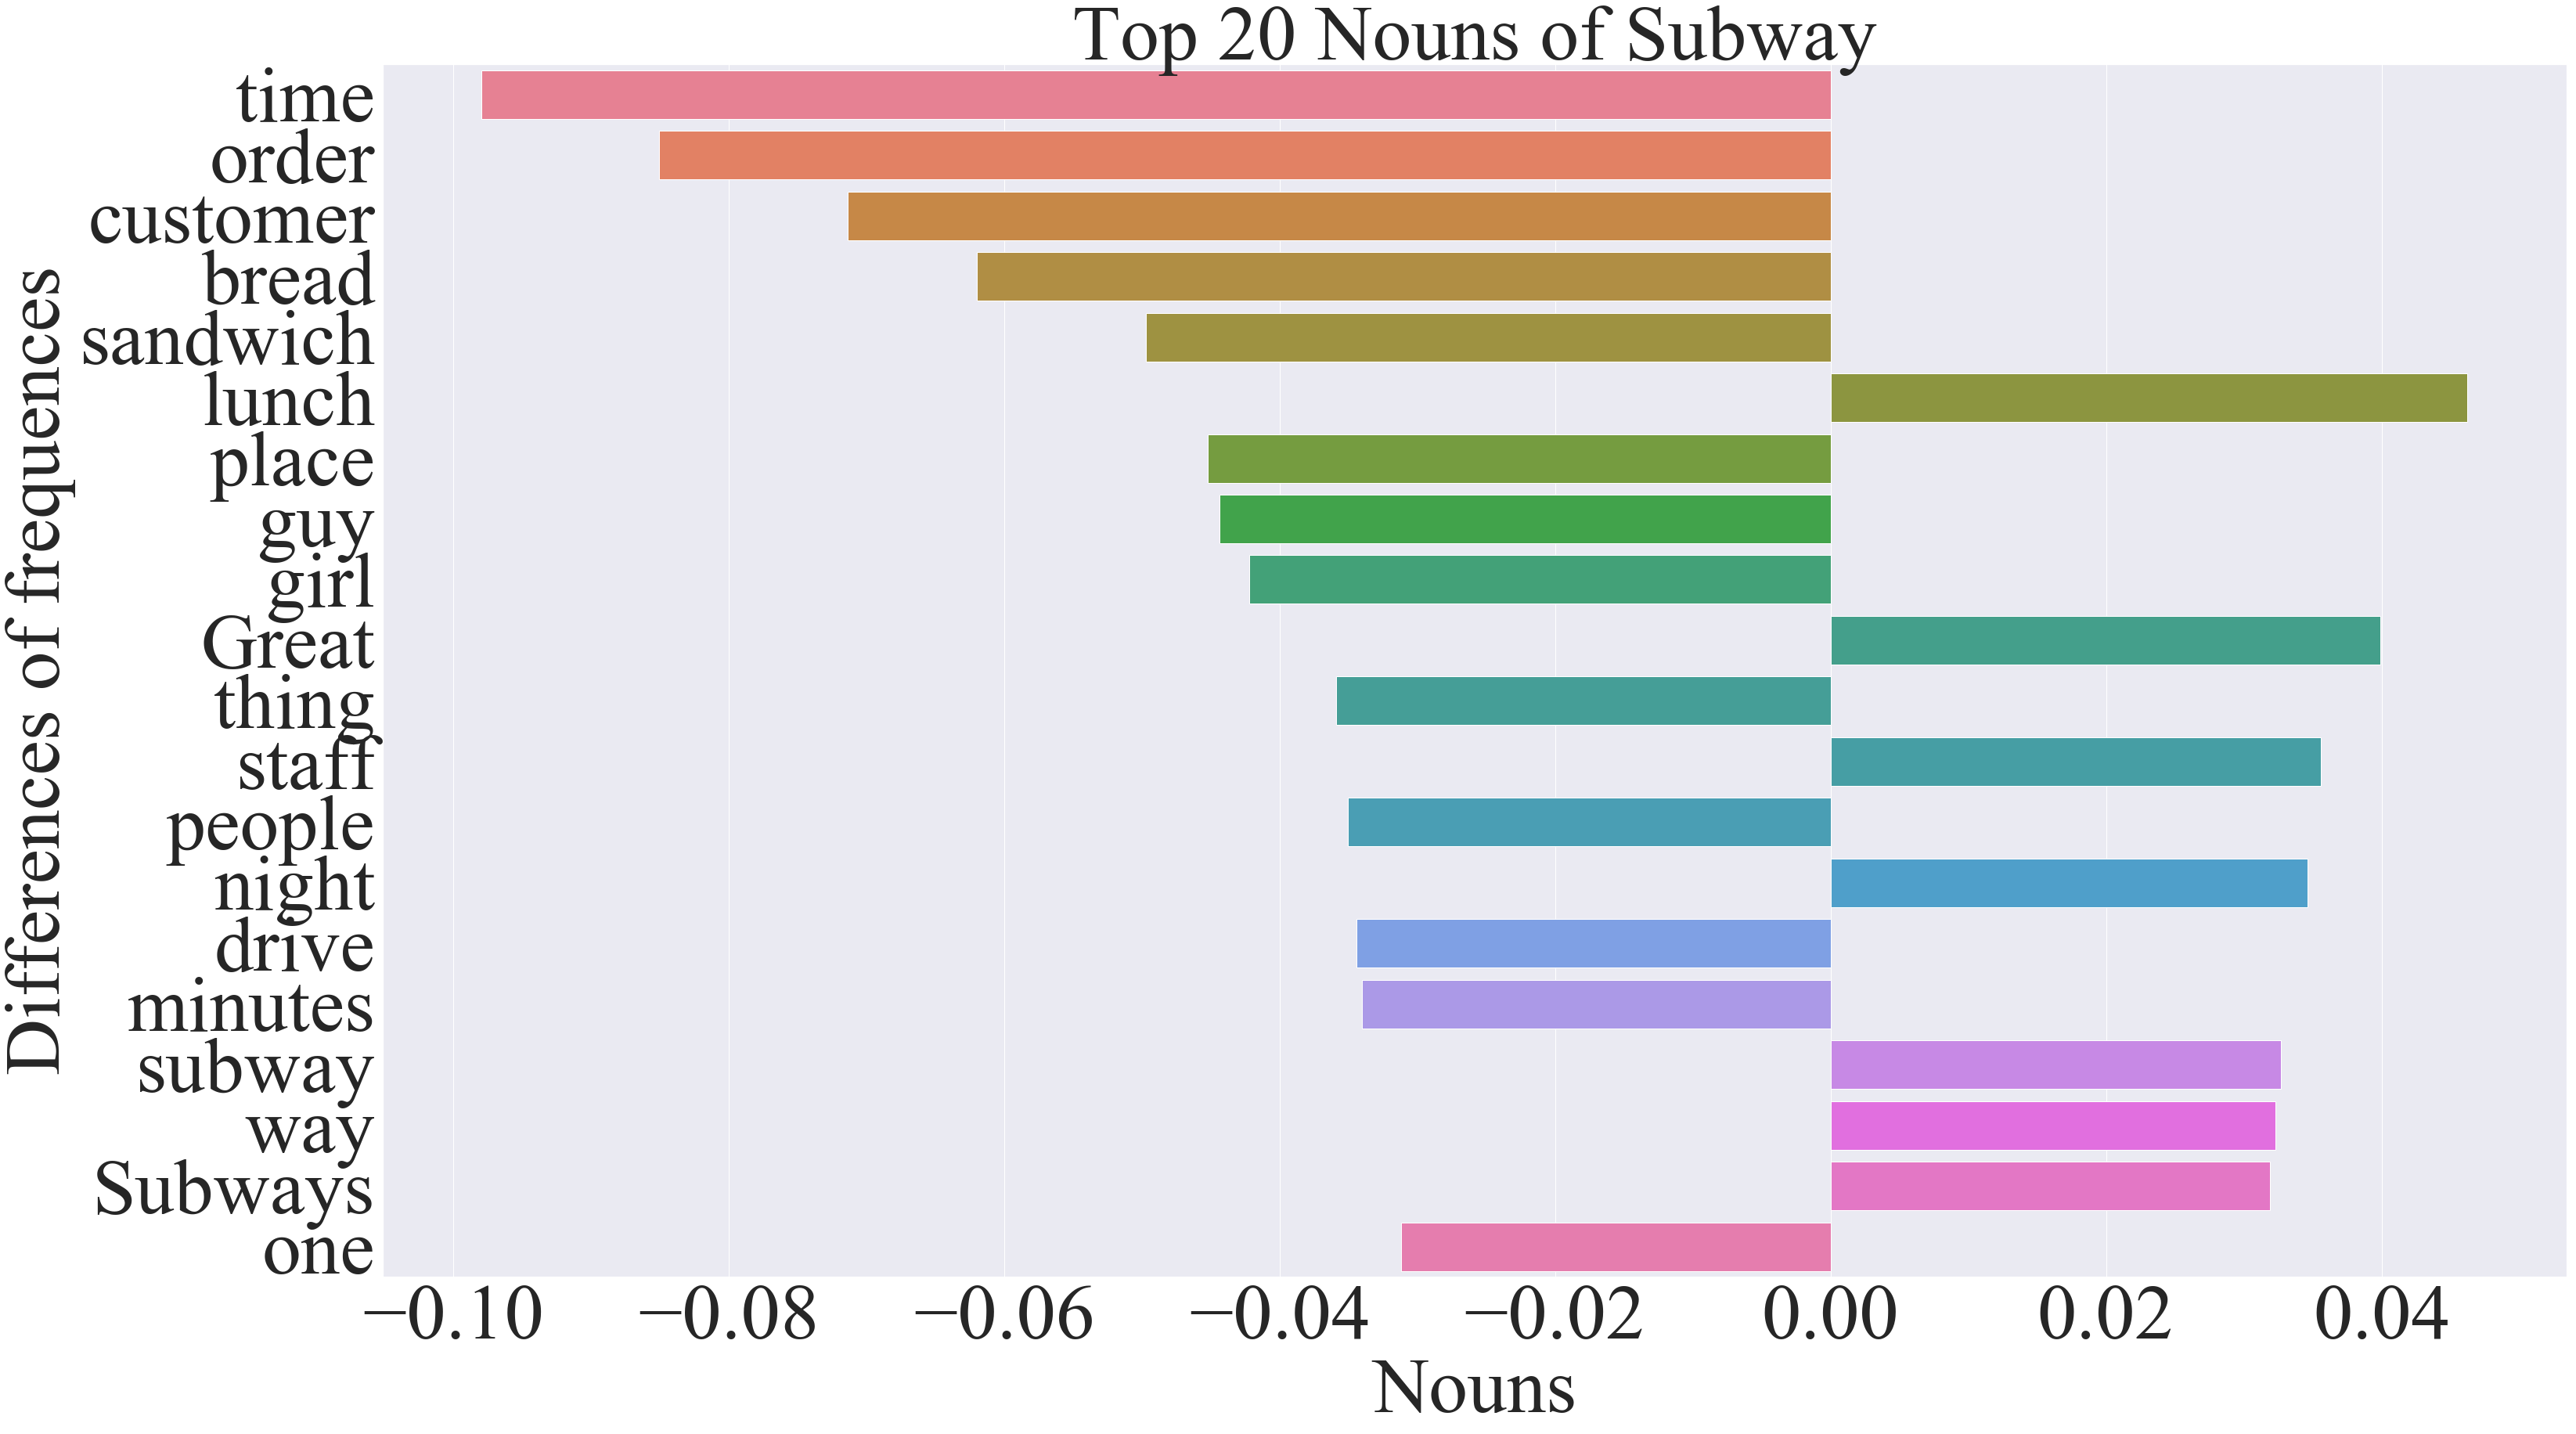

In [328]:
figsize = 50,28.5
figure, ax = plt.subplots(figsize=figsize)

font2 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 100,
         }

sns.barplot(x=y,y=x, palette='husl', ax=ax)

plt.tick_params(labelsize=100)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#plt.barh(x,y)
plt.xlabel("Nouns", font2)
plt.ylabel("Differences of frequences", font2)
plt.title("Top 20 Nouns of Subway", font2)
#plt.xlim([-2,20])
#plt.xticks(rotation=60)

plt.show()

In [330]:
l_adjs.head()

,adj,num,freqs
0,good,289,0.203521
1,great,173,0.121831
2,fresh,171,0.120423
3,clean,156,0.109859
4,bad,144,0.101408


In [331]:
h_adjs.head()

,adj,num,freq
0,good,150,0.267857
1,great,126,0.225000
2,friendly,111,0.198214
3,clean,103,0.183929
4,fresh,93,0.166071


In [332]:
old = pd.merge(l_adjs,h_adjs, on = 'adj')
old['FREQ'] = old['freq']-old['freqs'] #freqs--> l_nouns
old = old.iloc[(-old['FREQ'].abs()).argsort()]
old.head()
#old.to_csv("old.csv")
#old = pd.read_csv("old.csv")
old.head()

,adj,num_x,freqs,num_y,freq,FREQ
6,friendly,129,0.090845,111,0.198214,0.107369
1,great,173,0.121831,126,0.225000,0.103169
3,clean,156,0.109859,103,0.183929,0.074069
0,good,289,0.203521,150,0.267857,0.064336
21,best,75,0.052817,65,0.116071,0.063255


In [333]:
y = old['FREQ'].head(20)
x = old['adj'].head(20)

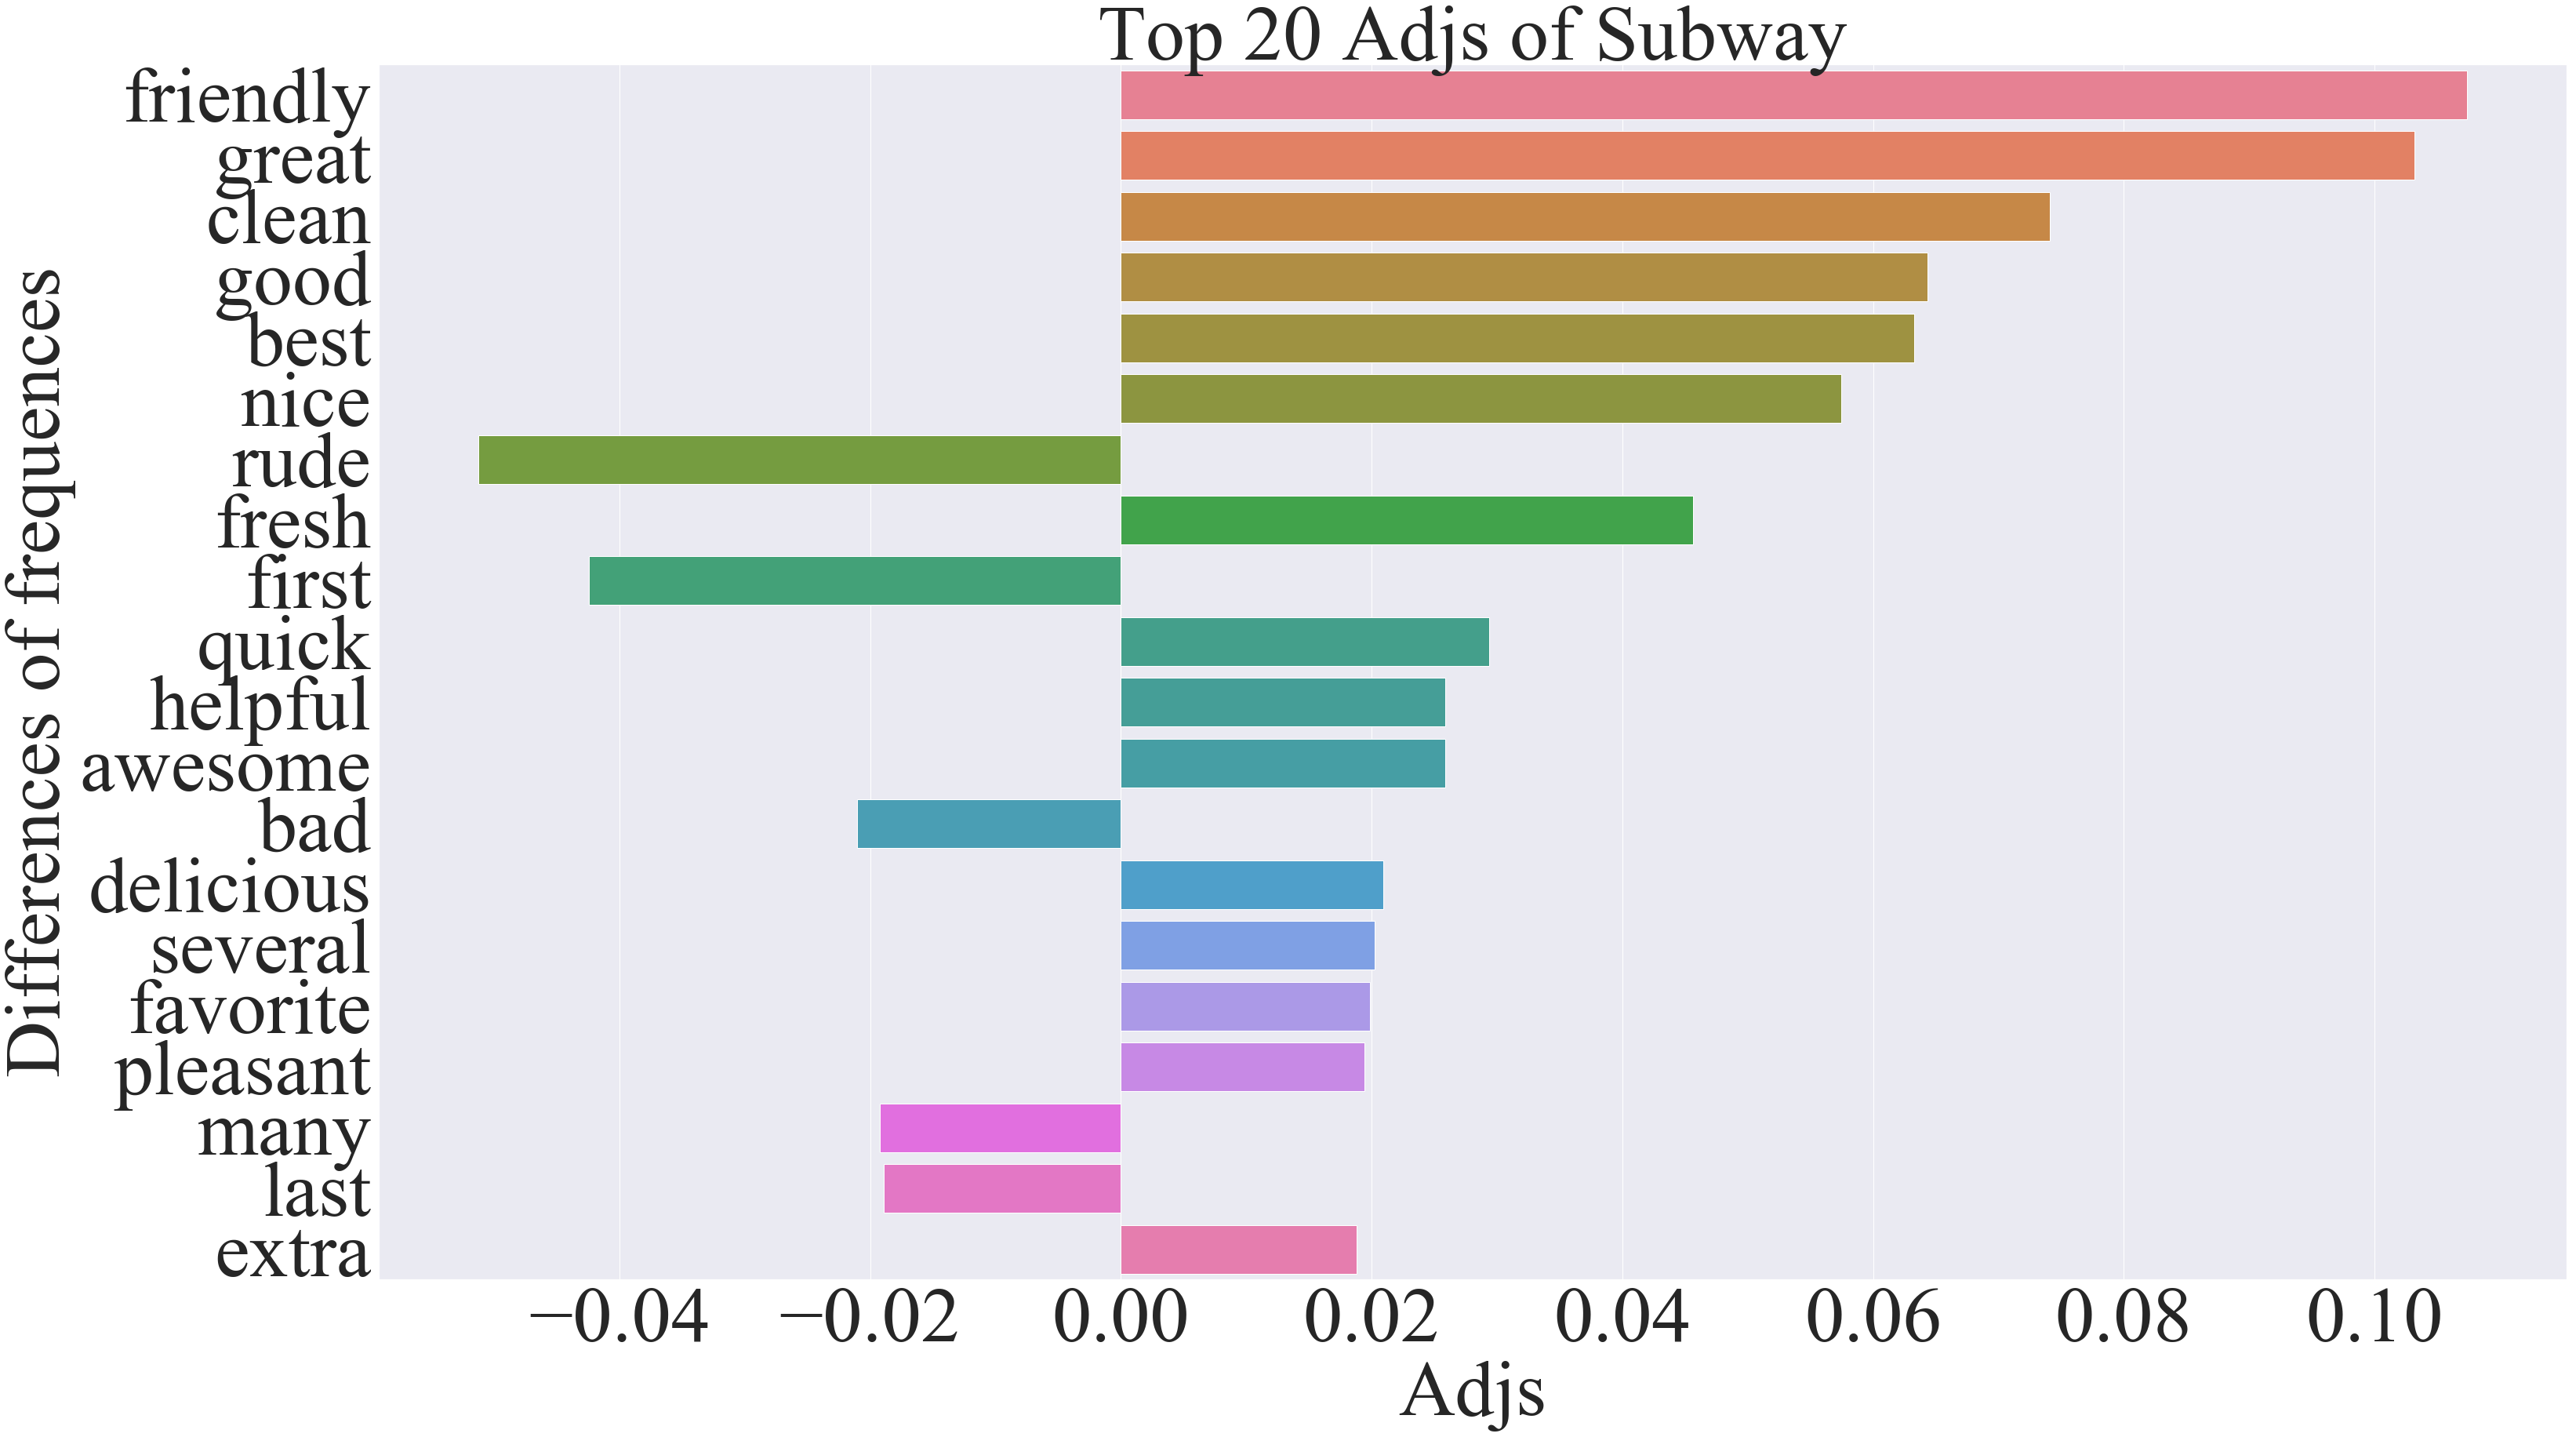

In [334]:
figsize = 50,28.5
figure, ax = plt.subplots(figsize=figsize)

font2 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 100,
         }



plt.tick_params(labelsize=100)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#plt.barh(x,y,palette='husl')

sns.barplot(x=y,y=x, palette='husl', ax=ax)

plt.xlabel("Adjs", font2)
plt.ylabel("Differences of frequences", font2)
plt.title("Top 20 Adjs of Subway", font2)
#plt.xlim([-1,20])
#plt.xticks(rotation=45)
plt.show()